Hasil Cross-Validation: [0.94285714 0.93571429 0.92857143 0.88571429 0.93571429]
Rata-rata Cross-Validation Score: 0.9257142857142856

Hasil Evaluasi pada Data Uji:
Akurasi: 0.92
Presisi: 0.87
Recall: 0.96
F1-Score: 0.92


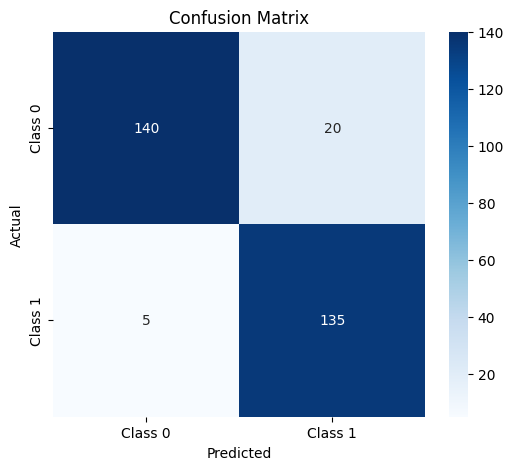


Best Parameters dari GridSearchCV: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9314285714285713

Akurasi Model dengan Parameter Terbaik: 0.92

Kesimpulan:
1. Cross-validation memberikan evaluasi model yang lebih terpercaya dengan mengurangi overfitting pada data latih.
2. Confusion Matrix membantu memahami distribusi kesalahan prediksi model.
3. Hyperparameter tuning dengan GridSearchCV meningkatkan performa model dengan mencari kombinasi parameter terbaik.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapan Data
# Membuat dataset sintetik untuk klasifikasi
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penjelasan:
# Dataset terdiri dari 1000 sampel, 20 fitur (10 informatif, 5 redundan). Data dibagi menjadi data latih (70%) dan data uji (30%).

# 2. Evaluasi Model dengan Cross-Validation
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Hasil Cross-Validation:", cv_scores)
print("Rata-rata Cross-Validation Score:", np.mean(cv_scores))

# Penjelasan:
# Cross-validation digunakan untuk mengevaluasi model dengan membagi data latih menjadi 5 lipatan.

# 3. Training dan Evaluasi Model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nHasil Evaluasi pada Data Uji:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Penjelasan:
# Confusion Matrix memberikan gambaran prediksi model terhadap data uji.

# 5. Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters dari GridSearchCV:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 6. Model dengan Parameter Terbaik
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_best_pred)
print(f"\nAkurasi Model dengan Parameter Terbaik: {accuracy_best:.2f}")

# Penjelasan:
# GridSearchCV mencari kombinasi parameter terbaik berdasarkan kriteria evaluasi tertentu (di sini, akurasi).

# Kesimpulan
print("\nKesimpulan:")
print("1. Cross-validation memberikan evaluasi model yang lebih terpercaya dengan mengurangi overfitting pada data latih.")
print("2. Confusion Matrix membantu memahami distribusi kesalahan prediksi model.")
print("3. Hyperparameter tuning dengan GridSearchCV meningkatkan performa model dengan mencari kombinasi parameter terbaik.")
